In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/studentscores.csv"
data = pd.read_csv(url)

In [10]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
data.shape

(25, 2)

<b>This notebook is only for coding practice as this is a small dataset

In [12]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [24]:
#check for missing values
display(data.isnull().any())

Hours     False
Scores    False
dtype: bool

In [113]:
#Correlations
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [14]:
#declare variables
X = data.iloc[ : ,   : 1 ].values
Y = data.iloc[ : , 1 ].values

## Plotting the Data

Text(0.5, 1.0, 'Test Scores by Hours of Study')

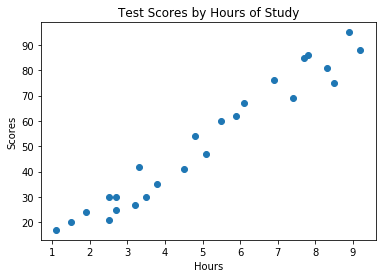

In [90]:
#Quicker scatterplot
plt.plot(X,Y, 'o')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Test Scores by Hours of Study")

In [122]:
#Plot in Plotly
import plotly.express as px

fig = px.scatter(data, x="Hours", y="Scores", text="Scores", size_max=60)

fig.update_traces(textposition='top right')

fig.update_layout(
    height=600,
    width=800,
    title_text='Test Scores by Hours of Study'
)

fig.show()

(0, 111.9853145572215)

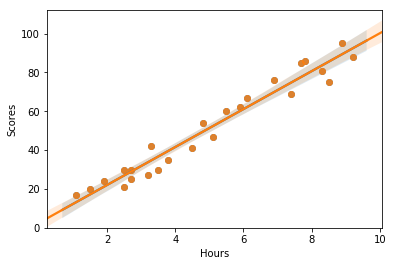

In [123]:
##Reg Plot in Seaborn
import seaborn as sns
sns.regplot(X,Y)
ax = sns.regplot(x="Hours", y="Scores", data=data)
plt.ylim(0,)

## Build Regression Model

In [69]:
#Split the data into 75/25
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

In [17]:
#Fit Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

In [143]:
regressor.coef_

array([9.94167834])

In [144]:
y_pred = regressor.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

Text(0.5, 0.98, 'Training Set')

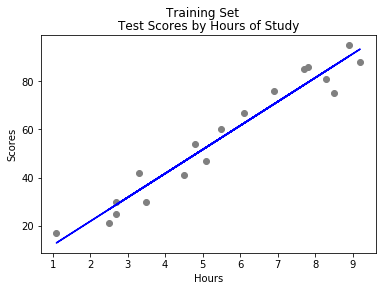

In [77]:
#Plot Training Results
plt.scatter(X_train, Y_train, color='grey')
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Test Scores by Hours of Study")
plt.suptitle("Training Set")

Text(0.5, 0.98, 'Testing Set')

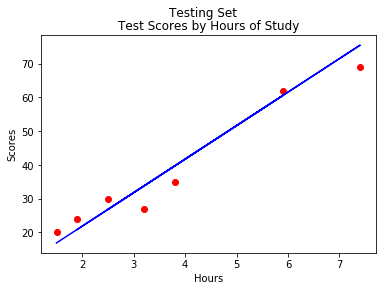

In [137]:
#Plot Test Results
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, regressor.predict(X_test), color="blue")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Test Scores by Hours of Study")
plt.suptitle("Testing Set")

Coefficients: 
 [9.94167834]
Mean squared error: 20.33
Coefficient of determination: 0.94


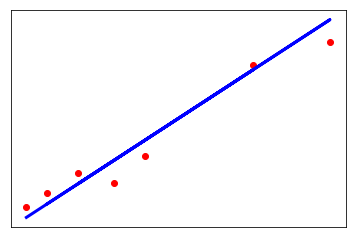

In [157]:
# The coefficients
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

<b><font color =green>The model is a very fit with an R^2 of 0.94, and an MSE of 20.33.